In [1]:
import os
import numpy as np
import nibabel as nib
from nilearn import image, plotting, masking
from nilearn.maskers import NiftiMasker

In [2]:
fmri_file = 'data/sub-01_ses-V1_task-S1_run-03_space-MNI152NLin2009cAsym_res-2_desc-denoisedSmoothed_bold.nii.gz'
fmri_img = nib.load(fmri_file)

# Initial testing

In [24]:
print(image.load_img(fmri_file).shape)

(97, 115, 97, 569)


In [25]:
first_vol = image.index_img(fmri_file, 0)
print(first_vol.shape)

(97, 115, 97)


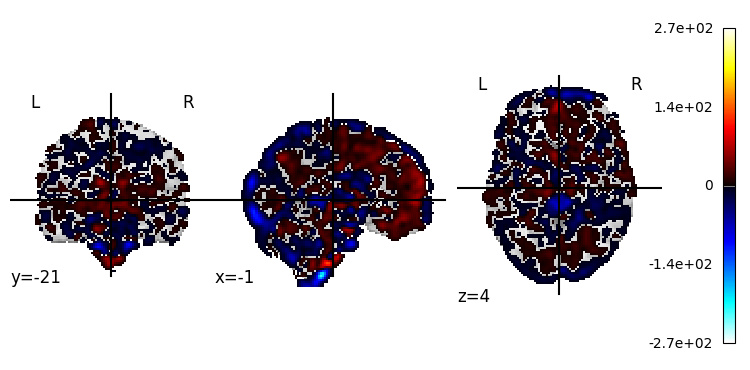

In [16]:
plotting.plot_stat_map(first_vol, threshold=3)

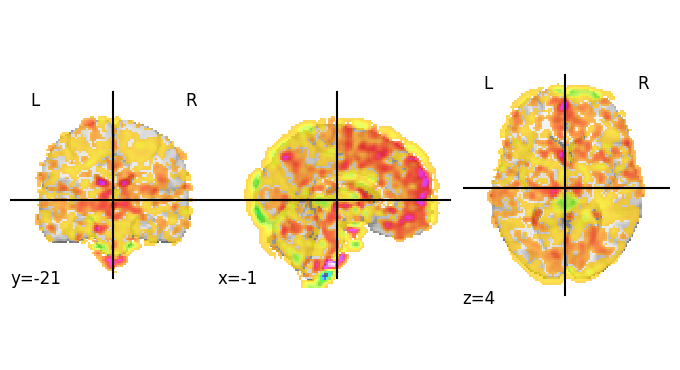

In [28]:
plotting.plot_roi(first_vol, threshold=3)

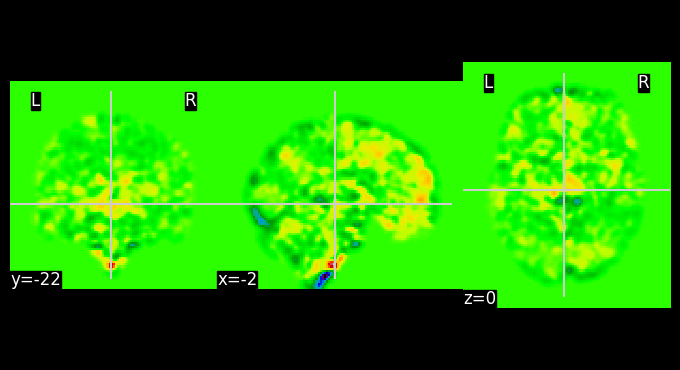

In [50]:
plotting.plot_epi(first_vol)

/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/nilearn/image/image.py:217: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  warnings.warn(


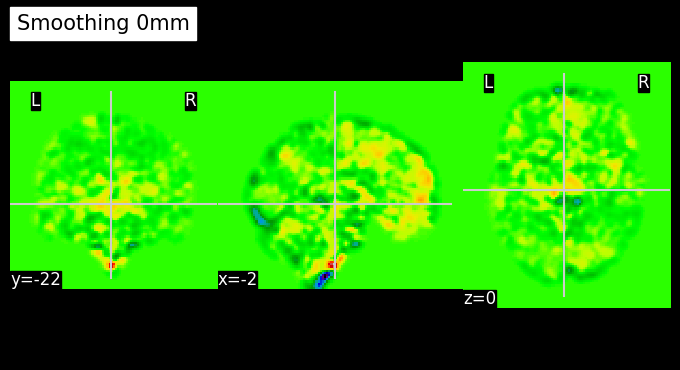

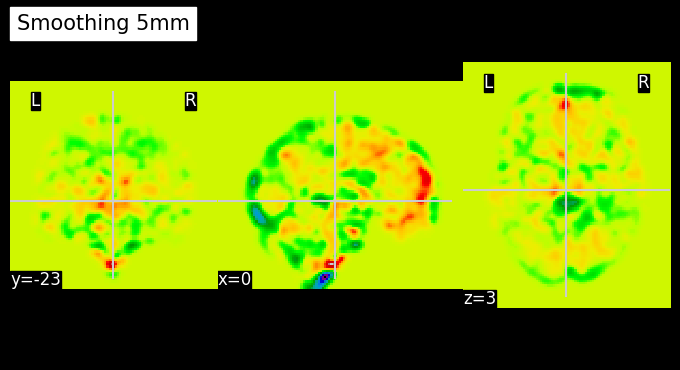

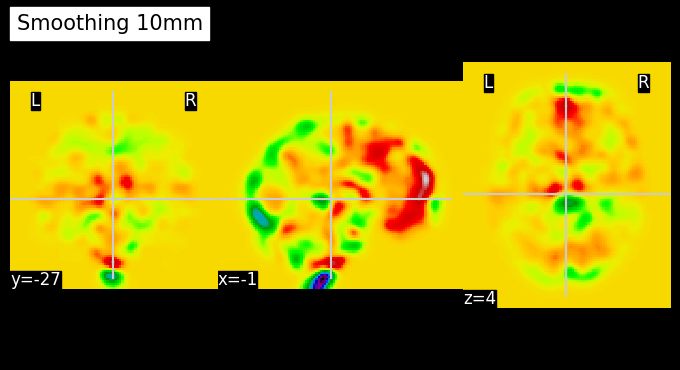

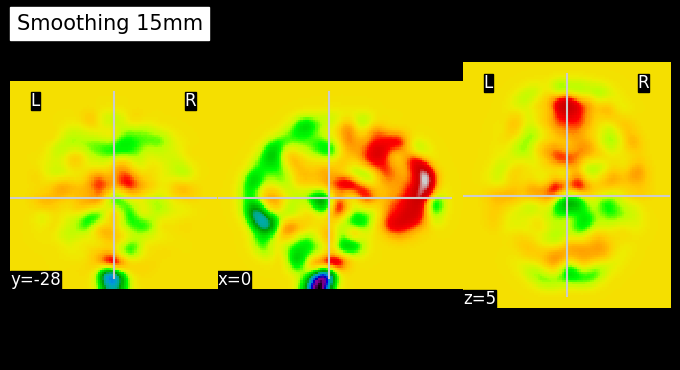

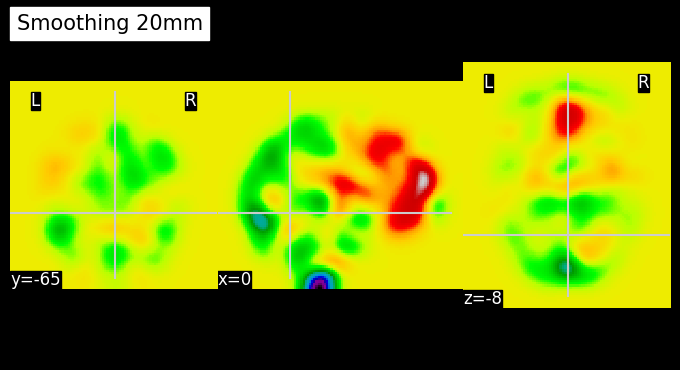

In [54]:
# Testing out different smoothing levels
for smoothing in range(0, 25, 5):
    smoothed_img = image.smooth_img(mean_first_vol, smoothing)
    plotting.plot_epi(smoothed_img, title=f"Smoothing {int(smoothing)}mm")

plotting.show()

# NiftiMasker

In [ ]:
from nilearn.maskers import NiftiMasker

In [83]:
my_file = 'data/sub-01_ses-V1_task-S1_run-03_space-MNI152NLin2009cAsym_res-2_desc-denoisedSmoothed_bold.nii.gz'
fmri_img = nib.load(my_file)

In [74]:
nifti_masker = NiftiMasker(
    mask_strategy='whole-brain-template',
    memory='nilearn_cache', 
    memory_level=1, 
    verbose=0,
    smoothing_fwhm=8
)

nifti_masker.fit(img)
mask_img = nifti_masker.mask_img_

/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/joblib/memory.py:693: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x3a7a7ae80>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/joblib/memory.py:887: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x3a7a7ae80>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,
/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/joblib/memory.py:693: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x3a7a7ae80>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/

NiftiMasker(mask_strategy='whole-brain-template',
            memory=Memory(location=nilearn_cache/joblib), smoothing_fwhm=8)

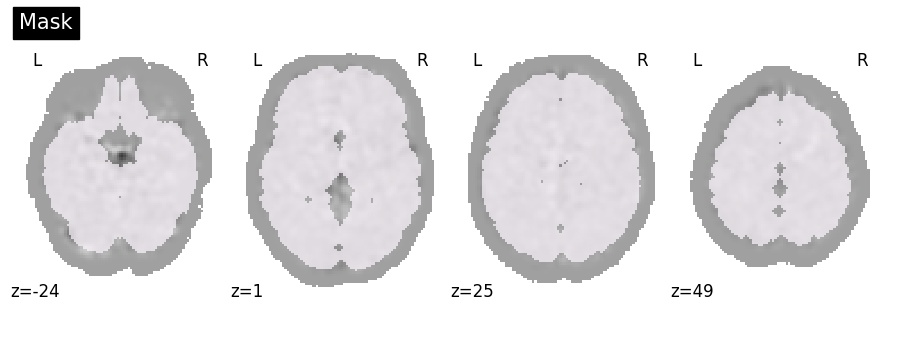

In [77]:
# calculate mean image for the background
mean_func_img = mean_img(img)
plotting.plot_roi(mask_img, mean_func_img, display_mode="z", cut_coords=4, title="Mask")

In [78]:
report = nifti_masker.generate_report()
report

In [79]:
nifti_masker.fit(img)
fmri_masked = nifti_masker.transform(img)

/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/joblib/memory.py:693: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x3a7a7ae80>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/nilearn/maskers/nifti_masker.py:570: UserWarning: Persisting input arguments took 21.87s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  data = self._cache(


In [ ]:
masked_img = masking.unmask(masked_data, mask_img)

In [82]:
first_volume = fmri_masked.slicer[:,:,:,0]
plotting.plot_epi(first_volume, title='Voxel-wise Signal Intensity', display_mode='ortho', cut_coords=(0, 0, 0))

AttributeError: 'numpy.ndarray' object has no attribute 'slicer'

# Applying brain and background mask

In [3]:
# brain_mask_img = masking.compute_brain_mask(fmri_file)
# background_mask_img = masking.compute_background_mask(fmri_file)
# epi_mask_img = masking.compute_epi_mask(fmri_file)

In [ ]:
# combined_mask = masking.intersect_masks([brain_mask_img, background_mask_img], threshold=0.5)

In [12]:
masker = NiftiMasker(mask_strategy="whole-brain-template", smoothing_fwhm=8, mask_args=dict(opening=2))
masker.fit(fmri_file)

report = masker.generate_report()
report

In [3]:
masker = NiftiMasker(mask_strategy="whole-brain-template")
masker.fit(fmri_file)

report = masker.generate_report()
report

In [4]:
masked_data = masker.transform(fmri_file)
masked_img = masker.inverse_transform(masked_data)

In [5]:
first_volume = masked_img.slicer[:,:,:,0]

In [22]:
# mean_img = image.mean_img(fmri_file)

In [10]:
x, y, z, n_volumes = masked_img.shape
print(n_volumes)

569


In [32]:
vmax = np.max(masked_img.get_fdata())
vmin = np.min(masked_img.get_fdata())

print(vmin, vmax)

-679.772798893734 815.1409852281984


In [42]:
for i in range(0, n_volumes):
    volume = image.index_img(masked_img, i)
    plotting.plot_epi(volume, title='Voxel-wise Signal Intensity', display_mode='ortho', cut_coords=(0, 0, 0), colorbar=True, vmin=vmin, vmax=vmax, black_bg=True, output_file=f'plots/volume_{i}.png')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103a99ee0>>
Traceback (most recent call last):
  File "/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103a99ee0>>
Traceback (most recent call last):
  File "/Users/burkelawlor/Repos/fmri-animation/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [35]:
import imageio
from glob import glob

In [41]:
images = []
for i in range(0, n_volumes, 50):
    filename = f'plots/volume_{i}.png'
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

/var/folders/7b/r27f_vg92fv7wynlljlh7c240000gn/T/ipykernel_12330/2991586484.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [38]:
files = glob('plots/volume_*.png')
files.sort()
files

['plots/volume_0.png',
 'plots/volume_100.png',
 'plots/volume_150.png',
 'plots/volume_200.png',
 'plots/volume_250.png',
 'plots/volume_300.png',
 'plots/volume_350.png',
 'plots/volume_400.png',
 'plots/volume_450.png',
 'plots/volume_50.png',
 'plots/volume_500.png',
 'plots/volume_550.png']